## Class activities for 8/30/22

For these activities you should find some data in your `Handouts` folder in a directory called `some_data`.

We will try to accomplish the following goals.

1. Solve the Python Challenge about mapping students to graders.
2. Load and analyze the data about genes using pandas
3. Load the year of birth names data and do some analysis
4. (Time permitting) Do some genetic analysis using `numpy`. 



In [1]:
### Your work here!

### I will be solving the above problems in real time in my version of this notebook...

### You can follow along and try your own solutions in this workspace. 



In [3]:
import numpy as np

students = "A B C D".split()
students

['A', 'B', 'C', 'D']

In [4]:
students = np.array(students)

In [1]:
import numpy as np


In [2]:
students = np.array("A B C D".split())

In [6]:
students


array(['A', 'B', 'C', 'D'], dtype='<U1')

In [41]:
import numpy as np

students = input("students: ").split()

rnd = np.random

while True:
    students_scramble = rnd.choice(students,len(students),replace=False)
    if (~(students_scramble == students)).all():
        break
        
first_grader = np.copy(students_scramble)
first_grader

while True:
    students_scramble = rnd.choice(students,len(students),replace=False)
    if (~(students_scramble == students)).all() and (~(students_scramble == first_grader)).all():
        break

second_grader=np.copy(students_scramble)

for s1,s2,s3 in zip(students,first_grader,second_grader):
    print(f"{s1} has been assigned {s2} and {s3} as his or her graders")

students:  mark Mitchell pete


mark has been assigned pete and Mitchell as his or her graders
Mitchell has been assigned mark and pete as his or her graders
pete has been assigned Mitchell and mark as his or her graders


In [30]:
first_grader

array(['D', 'A', 'B', 'C'], dtype='<U1')

In [42]:
A = np.arange(7,17)
A

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [43]:
A*2

array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32])

In [51]:
import pandas as pd

df = pd.read_csv("../Handouts/some_data/genes/ID3.csv")
df.head(5)

,mir,sapiens,denisovan,altai,vindja,chag,DiffSapDen,DiffSapVin,DiffSapAlt,DiffDenVin,DiffDenAlt,DiffAltVin,DiffSapCha,DiffVinCha,DiffDenCha,DiffAltCha
0,miR-6819-5p,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,miR-668-5p,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,miR-10527-5p,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,miR-3689c,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
4,miR-552-3p,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
df=df.set_index("mir")

In [58]:
df_homo = df[["sapiens","denisovan","altai","vindja","chag"]]

In [77]:
homo_corr = df_homo.corr()
homo_corr

,sapiens,denisovan,altai,vindja,chag
sapiens,1.000000,0.978893,0.984923,0.985919,0.984923
denisovan,0.978893,1.000000,0.991964,0.992965,0.991964
altai,0.984923,0.991964,1.000000,0.998995,0.997991
vindja,0.985919,0.992965,0.998995,1.000000,0.998995
chag,0.984923,0.991964,0.997991,0.998995,1.000000


In [71]:
disagree = df_homo['sapiens'] != df_homo['denisovan']

In [72]:
disagree

mir
miR-6819-5p     False
miR-668-5p      False
miR-10527-5p    False
miR-3689c       False
miR-552-3p      False
                ...  
miR-4662a-3p    False
miR-10397-5p    False
miR-1178-3p     False
miR-6769b-5p    False
miR-432-5p      False
Length: 2647, dtype: bool

In [74]:
disag_loc = np.where(disagree)[0]
disag_loc


array([  53,  162,  285,  342,  433,  737,  741, 1114, 1210, 1262, 1289,
       1340, 1351, 1530, 1546, 1616, 1671, 1968, 2257, 2433, 2496])

In [76]:
df_homo.index[disag_loc]

Index(['miR-4766-5p', 'miR-7161-5p', 'miR-548n', 'miR-609', 'miR-146a-3p',
       'miR-3152-3p', 'miR-769-5p', 'miR-1270', 'miR-548ao-3p', 'miR-5687',
       'miR-548u', 'miR-4478', 'miR-4804-5p', 'miR-5708', 'miR-4709-3p',
       'miR-4465', 'miR-4786-5p', 'miR-6736-3p', 'miR-3179', 'miR-3667-5p',
       'miR-6826-5p'],
      dtype='object', name='mir')

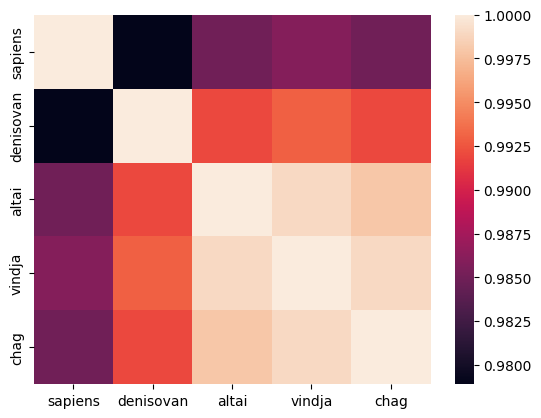

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(homo_corr)
plt.show()

<AxesSubplot:xlabel='sapiens', ylabel='chag'>

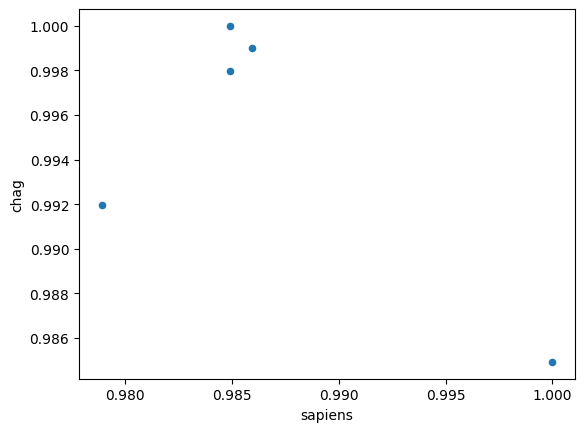

In [84]:
homo_corr.plot(x="sapiens",y="chag",kind="scatter")

In [93]:
columns = ["name","sex","count"]
df=pd.read_csv("../Handouts/some_data/names/yob1880.txt",header=None)
df.columns = columns
df=df.set_index("name")
df

,sex,count
name,,
Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
...,...,...
Woodie,M,5
Worthy,M,5
Wright,M,5
